In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

**Load Data set**

In [2]:
digits = load_digits()

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
digits.target.shape

(1797,)

Look at the image representation

In [5]:
digits.images[0,:,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Look at the image

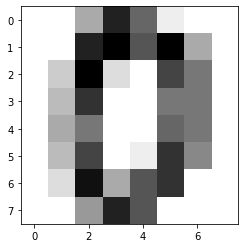

In [6]:
plt.imshow(digits.images[0,:,:], cmap= plt.cm.gray_r, interpolation= 'nearest');

Create X and y (features and targets)

In [7]:
n_samples = digits.images.shape[0]
X = digits.images.reshape((n_samples, -1))
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

Create a small test set to later use it for evaluation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

**SVC instance**

Below is a small snippet from the SVC documentation. If the dataset was much larger, this model would become infeasible. 

![title](img/SVC.png)

In [9]:
clf = SVC()

Dictionary of potential model parameters (Search space that we investigate with Grid Search)

In [10]:
params = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

**GridSearch instance**

In [11]:
grid = GridSearchCV(clf, params, cv= 5, scoring= 'accuracy')

Fit the Grid Search object

In [12]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

Check best parameter setting and highest accuracy

In [13]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [14]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [15]:
grid.best_score_

0.9721866295264624

The best performing model has a mean accuracy of ~97.22 %.

**Fit SVC instance (with "best_params_" of grid search) to get a sense of the errors the model makes**

In [16]:
clf = SVC(gamma= 0.001)

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

In [17]:
print("Classification report for model %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, predicted)))

Classification report for model SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       0.97      1.00      0.99        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450




The model has a staggering performance, however, the task at hand is known to be solved "accurately". The model identifies the labels accurately (accuracy is between 97% and 100%) and rarely misses a label -this information comes from the recall column.

**Visualize test pictures and respective predictions**

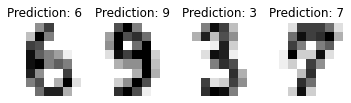

In [18]:
img_and_pred = list(zip(X_test, predicted))

for index, (image, prediction) in enumerate(img_and_pred[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image.reshape(8, 8), cmap= plt.cm.gray_r, interpolation= 'nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()